<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib notebook


def tanh_switch(rho, kappa=5., theta=0.8):
    return 0.5 * (1 + np.tanh(kappa * (rho - theta)))

def memory_switch_pos(rho, theta=1.0, b=1.0):
    return 3*b/(rho-theta)
def memory_switch_neg(rho, theta=1.0, b=1.0):#use this when (rho-theta)/b = negative
    return -1.5*b/(rho-theta)
def memory_switch(rho, theta=1.0, b=1.0): #use this and then later multiply by 3 or -1.5 based on ratio sign
    return b/(rho-theta)
N = 500
r_switch_half = np.zeros([N,N])
r_switch_full = np.zeros([N,N])
kappas = np.linspace(-10,10,N)
thetas = np.linspace(0,1,N)
kap,the = np.meshgrid(kappas, thetas)

r_switch_half_filled =(tanh_switch(0.5, kap, the))
r_switch_full_filled = (tanh_switch(1.0, kap, the))
r_switch_threefourth_filled = (tanh_switch(0.75, kap, the))
r_switch_quarter_filled = (tanh_switch(0.25, kap, the))
r_switch_empty = (tanh_switch(0.0, kap, the))


In [18]:
N = 100
b = np.linspace(-1,1,N)
thets = np.linspace(0,1,N)
rho = 0.0
bs, thes = np.meshgrid(b,thets)
rs1 = memory_switch(rho, thes, bs)
rs1mod = np.where(rs1<0, -1.5*rs1, 3*rs1)
rs1mod.max()
rs1mod = np.ma.array(rs1mod)
maskrs1mod = np.ma.masked_where(rs1mod > 1.0, rs1mod)


/home/quasar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [27]:
rsempty = memory_switch(0.0, thes, bs)
rsquarter = memory_switch(0.25, thes, bs)
rshalf = memory_switch(0.5, thes, bs)
rsthreequarter = memory_switch(0.75, thes, bs)
rsfull = memory_switch(1.0, thes, bs)
rsemptymod = np.where(rsempty<0, -1.5*rsempty, 3*rsempty)
rsquartermod = np.where(rsquarter<0, -1.5*rsquarter, 3*rsquarter)
rshalfmod = np.where(rshalf<0, -1.5*rshalf, 3*rshalf)
rsthreequartermod = np.where(rsthreequarter<0, -1.5*rsthreequarter, 3*rsthreequarter)
rsfullmod = np.where(rsfull<0, -1.5*rsfull, 3*rsfull)
maskrsemptymod = np.ma.masked_where(rsemptymod > 1.0, rsemptymod)
maskrsquartermod = np.ma.masked_where(rsquartermod > 1.0, rsquartermod)
maskrshalfmod = np.ma.masked_where(rshalfmod > 1.0,rshalfmod)
maskrsthreequartermod = np.ma.masked_where(rsthreequartermod > 1.0, rsthreequartermod)
maskrsfullmod = np.ma.masked_where(rsfullmod > 1.0, rsfullmod)


/home/quasar/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


<IPython.core.display.Javascript object>


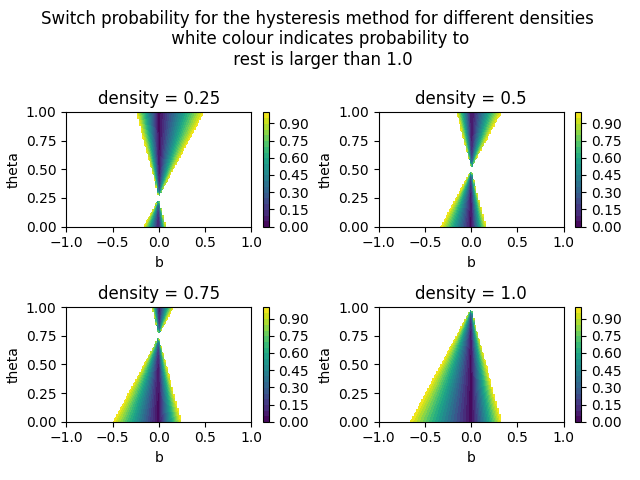

In [28]:
#fig, axes = plt.subplots(3, 2, figsize=(8,8), sharex=True)
plt.figure()
plt.suptitle("Switch probability for the hysteresis method for different densities \n white colour indicates probability to \n rest is larger than 1.0")
#plt.subplot(321)
#ax0 = plt.contourf(bs, thes, maskrsemptymod, 20, cmap='viridis')
#plt.colorbar(ax0)
plt.subplot(221)
ax1 = plt.contourf(bs, thes, maskrsquartermod, 20, cmap='viridis')
plt.title("density = 0.25")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax1)
plt.subplot(222)
ax2 = plt.contourf(bs, thes, maskrshalfmod, 20, cmap='viridis')
plt.title("density = 0.5")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax2)
plt.subplot(223)
ax3 = plt.contourf(bs, thes, maskrsthreequartermod, 20, cmap='viridis')
plt.title("density = 0.75")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax3)
plt.subplot(224)
ax4 = plt.contourf(bs, thes, maskrsfullmod, 20, cmap='viridis')
plt.title("density = 1.0")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax4)
plt.tight_layout()

<IPython.core.display.Javascript object>


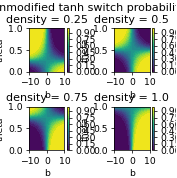

In [7]:
#fig, axes = plt.subplots(3, 2, figsize=(8,8), sharex=True)
plt.figure(figsize=((4,4)))
plt.suptitle("Unmodified tanh switch probability")
#plt.subplot(321)
#ax0 = plt.contourf(bs, thes, maskrsemptymod, 20, cmap='viridis')
#plt.colorbar(ax0)
plt.subplot(221)
ax1 = plt.contourf(kappas, thetas, r_switch_quarter_filled, 20, cmap='viridis')
plt.title("density = 0.25")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax1)
plt.subplot(222)
ax2 = plt.contourf(kappas, thetas, r_switch_half_filled, 20, cmap='viridis')
plt.title("density = 0.5")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax2)
plt.subplot(223)
ax3 = plt.contourf(kappas, thetas, r_switch_threefourth_filled, 20, cmap='viridis')
plt.title("density = 0.75")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax3)
plt.subplot(224)
ax4 = plt.contourf(kappas, thetas, r_switch_full_filled, 20, cmap='viridis')
plt.title("density = 1.0")
plt.xlabel("b")
plt.ylabel("theta")
plt.colorbar(ax4)
plt.tight_layout()
plt.savefig("1_0.png")

<IPython.core.display.Javascript object>


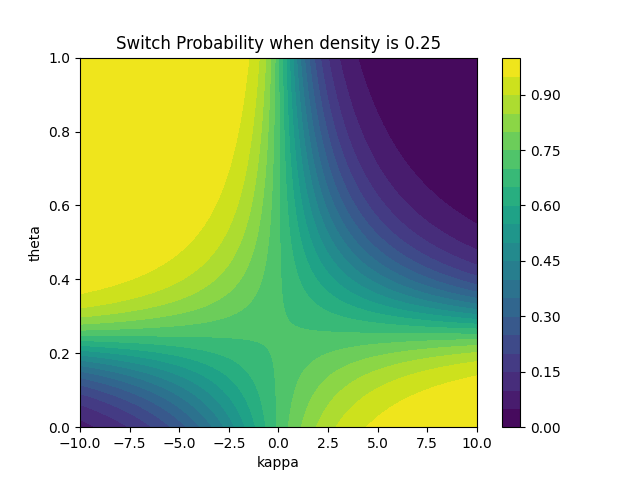

In [39]:
# Plot the surface.
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_quarter_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Switch Probability when density is 0.25')
plt.show()

<IPython.core.display.Javascript object>


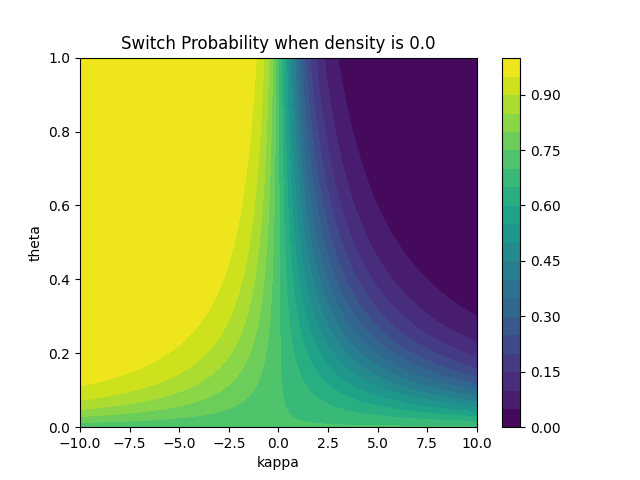

In [35]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_empty, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Switch Probability when density is 0.0')
#plt.savefig('Resting Probability when density is 0.0.jpg')
plt.show()

<IPython.core.display.Javascript object>


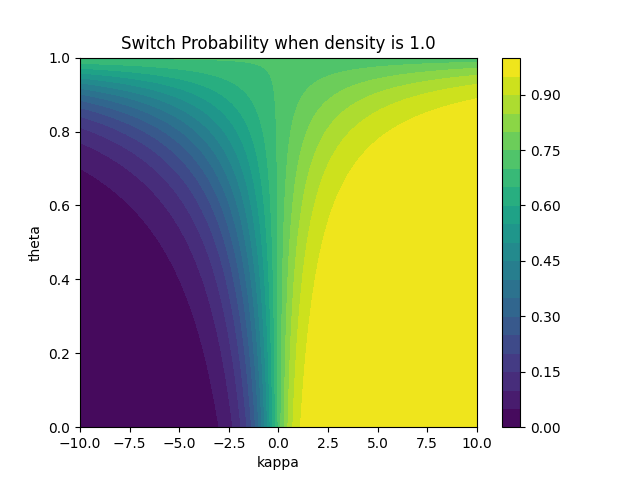

In [36]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_full_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Switch Probability when density is 1.0')
plt.show()

<IPython.core.display.Javascript object>


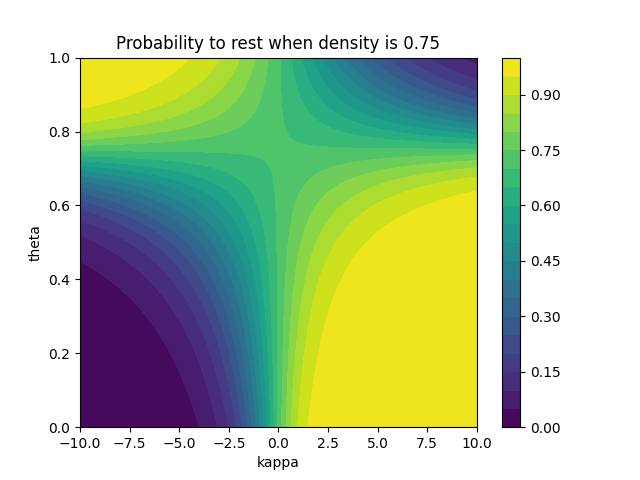

In [37]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_threefourth_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.75')
#plt.savefig("threefourth.jpg")
plt.show()


<IPython.core.display.Javascript object>


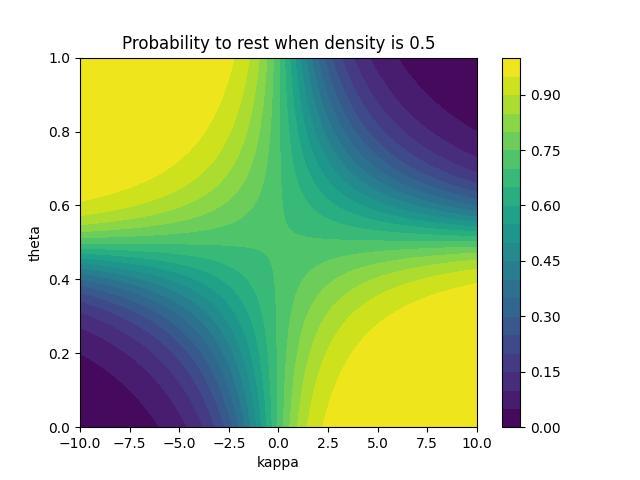

In [38]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_half_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.5')
#plt.savefig("half.jpg")
plt.show()

<IPython.core.display.Javascript object>


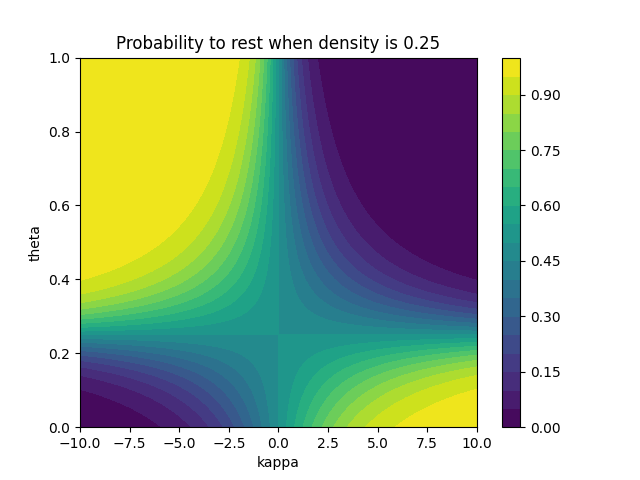

In [10]:
# Plot the surface.
fig = plt.figure()

plt.contourf(kappas, thetas, r_switch_quarter_filled, 20, cmap='viridis')
# Add a color bar which maps values to colors.
plt.colorbar()
plt.xlabel('kappa')
plt.ylabel('theta')
plt.title('Probability to rest when density is 0.25')
#plt.savefig("quarter.jpg")
plt.show()